<a href="https://colab.research.google.com/github/williamedwardhahn/ComplexSystems/blob/main/Complex_Systems_Lab_Chua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Chua Cellular Nonlinear Networks](https://www.youtube.com/watch?v=I1rLjjjjbbE)

Watch video for explanation of Chua Networks 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook
import numpy as np
import scipy.ndimage
import tensorflow as tf
from scipy.ndimage.filters import gaussian_filter 
# from scipy.misc import imresize
from scipy import signal
from skimage import io
from sklearn.preprocessing import scale
from PIL import Image
import time
import torch
import numpy as np
import torch.nn as nn
from scipy import stats
from skimage import io as io
import matplotlib.pyplot as plt
import torch.nn.functional as F
from skimage.util import montage
from torch.nn.functional import *
from torch.autograd import Variable
from torchvision import datasets, transforms

In [ ]:
def get_texture_discrimination_cnn():
    B = np.matrix('0.16 -1.56 1.25; -2.89 1.09 -3.2; 4.06 4.69 3.75')[None,None,:,:]
    A = np.matrix('0.86 0.94 3.75; 2.11 -2.81 3.75; -1.33 -2.58 -1.02')[None,None,:,:]
    return (A, B, 1.8)

def get_inverse_half_tone_cnn():
    B = np.matrix('0.07 0.1 0.07; 0.1 0.32 0.1; 0.07 0.1 0.07')[None,None,:,:]
    A = np.matrix('0 0 0; 0 0 0; 0 0 0')[None,None,:,:]
    return (A, B, 0)

def get_face_vase_cnn():
    B = np.matrix('0 0 0; 0 -5 0; 0 0 0')[None,None,:,:]
    A = np.matrix('0 1 0; 1 2 1; 0 1 0')[None,None,:,:]
    return (A, B, 0)

def get_half_tone_cnn():
    B = np.matrix('0.07 0.1 0.07; 0.1 0.32 0.1; 0.07 0.1 0.07')[None,None,:,:]
    A = np.matrix('-0.07 -0.1 -0.07; -0.1 1.15 -0.1; -0.07 -0.1 -0.07')[None,None,:,:]
    return (A, B, 0)

def get_global_connection_cnn():
    B = np.matrix('0 -0.5 0; -0.5 3 -0.5; 0 -0.5 0')[None,None,:,:]
    A = np.matrix('0 0.5 0; 0.5 3 0.5; 0 0.5 0')[None,None,:,:]
    return (A, B, -4.5)

def get_hole_filling_cnn():
    B = np.matrix('0 0 0; 0 4 0; 0 0 0')[None,None,:,:]
    A = np.matrix('0 1 0; 1 3 1; 0 1 0')[None,None,:,:]
    return (A, B, -1)

def get_filled_contour_extract_cnn():
    B = np.matrix('0 0 0; 0 2 0; 0 0 0')[None,None,:,:]
    A = np.matrix('0 1 0; 1 5 1; 0 1 0')[None,None,:,:]
    return (A, B, -5.25)

def get_diagonal_line_cnn():
    B = np.matrix('-2 0 2; 0 0 0; 2 0 -2')[None,None,:,:]
    A = np.matrix('0 0.75 0; 0.75 2 0.75; 0 0.75 0')[None,None,:,:]
    return (A, B, 0)

def get_selected_objects_extraction_cnn():
    B = np.matrix('0 0 0; 0 1.75 0; 0 0 0')[None,None,:,:]
    A = np.matrix('0.25 0.25 0.25; 0.25 1 0.25; 0.25 0.25 0.25')[None,None,:,:]
    return (A, B, 0)

def get_vertical_hole_cnn():
    B = np.matrix('0 0 0; 0 2 0; 0 0 0')[None,None,:,:]
    A = np.matrix('0 1 0; 0 2 0; 0 -1 0')[None,None,:,:]
    return (A, B, 0)

def get_diagonal_hole_cnn():
    B = np.matrix('0 0 0; 0 2 0; 0 0 0')[None,None,:,:]
    A = np.matrix('1 0 0; 0 2 0; 0 0 -1')[None,None,:,:]
    return (A, B, 0)

def get_shadow_projection_cnn():
    B = np.matrix('0 0 0; 0 2 0; 0 0 0')[None,None,:,:]
    A = np.matrix('0 0 0; 0 2 2; 0 0 0')[None,None,:,:]
    return (A, B, 0)

def get_horizontal_hole_cnn():
    B = np.matrix('0 0 0; 0 0 0; 0 0 0')[None,None,:,:]
    A = np.matrix('0 0 0; 1 2 -1; 0 0 0')[None,None,:,:]
    return (A, B, 0)

def get_dilation_cnn():
    B = np.matrix('0 1 0; 1 1 1; 0 1 0')[None,None,:,:]
    A = np.matrix('0 0 0; 0 2 0; 0 0 0')[None,None,:,:]
    return (A, B, -4.5)

def get_right_edge_cnn():
    B = np.matrix('0 0 0; 1 1 -1; 0 0 0')[None,None,:,:]
    A = np.matrix('0 0 0; 0 1 0; 0 0 0')[None,None,:,:]
    return (A, B, -2)

def get_erosion_cnn():
    B = np.matrix('0 1 0; 1 1 1; 0 1 0')[None,None,:,:]
    A = np.matrix('0 0 0; 0 2 0; 0 0 0')[None,None,:,:]
    return (A, B, -4.5)

def get_edge_detection_cnn():
    B = np.matrix('-1 -1 -1; -1 8 -1; -1 -1 -1')[None,None,:,:]
    A = np.matrix('0 0 0; 0 2 0; 0 0 0')[None,None,:,:]
    return (A, B, -0.5)

def get_corner_detection_cnn():
    B = np.matrix('-1 -1 -1; -1 8 -1; -1 -1 -1')[None,None,:,:]
    A = np.matrix('0 0 0; 0 2 0; 0 0 0')[None,None,:,:]
    return (A, B, -8.5)

def get_logical_and_cnn():
    B = np.matrix('0 0 0; 0 1 0; 0 0 0')[None,None,:,:]
    A = np.matrix('0 0 0; 0 2 0; 0 0 0')[None,None,:,:]
    return (A, B, -1)

def get_logical_or_cnn():
    B = np.matrix('0 0 0; 0 1 0; 0 0 0')[None,None,:,:]
    A = np.matrix('0 0 0; 0 2 0; 0 0 0')[None,None,:,:]
    return (A, B, 1)

def get_logical_not_cnn():
    B = np.matrix('0 0 0; 0 -2 0; 0 0 0')[None,None,:,:]
    A = np.matrix('0 0 0; 0 1 0; 0 0 0')[None,None,:,:]
    return (A, B, 0)

def get_point_extraction_cnn():
    B = np.matrix('-1 -1 -1; -1 1 -1; -1 -1 -1')[None,None,:,:]
    A = np.matrix('0 0 0; 0 1 0; 0 0 0')[None,None,:,:]
    return (A, B, -8)

def get_point_removal_cnn():
    B = np.matrix('1 1 1; 1 8 1; 1 1 1')[None,None,:,:]
    A = np.matrix('0 0 0; 0 1 0; 0 0 0')[None,None,:,:]
    return (A, B, -1)

def get_vertical_translation_cnn():
    B = np.matrix('0 0 0; 0 0 0; 0 1 0')[None,None,:,:]
    A = np.matrix('0 0 0; 0 1 0; 0 0 0')[None,None,:,:]
    return (A, B, 0)

def get_diagonal_translation_cnn():
    B = np.matrix('1 0 0; 0 0 0; 0 0 0')[None,None,:,:]
    A = np.matrix('0 0 0; 0 1 0; 0 0 0')[None,None,:,:]
    return (A, B, 0)

def get_threshold_cnn():
    B = np.matrix('0 0 0; 0 0 0; 0 0 0')[None,None,:,:]
    #B = np.matrix('-1 -1 -1;-1 8 -1;-1 -1 -1')[None,None,:,:]
    A = np.matrix('0 0 0; 0 2 0; 0 0 0')[None,None,:,:]
    return (A, B, -0.5)

def get_horizontal_translation_cnn():
    B = np.matrix('0 0 0; 1 0 0; 0 0 0')[None,None,:,:]
    A = np.matrix('0 0 0; 0 1 0; 0 0 0')[None,None,:,:]
    return (A, B, 0)

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

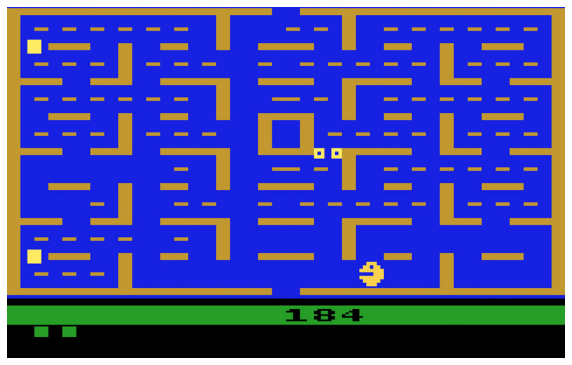

In [ ]:
image = io.imread("http://www.8-bitcentral.com/images/reviews/atari2600/pacMan2600Screen.jpg")
plot(image)

In [ ]:
def f(x):
    return (abs(x+1)/2 - abs(x-1)/2);

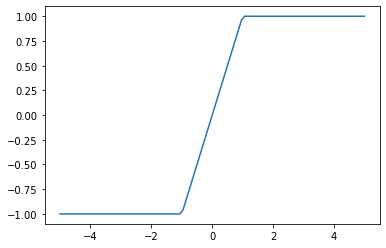

In [ ]:
x = np.linspace(-5,5,100)
y = f(x)
plt.plot(x,y)

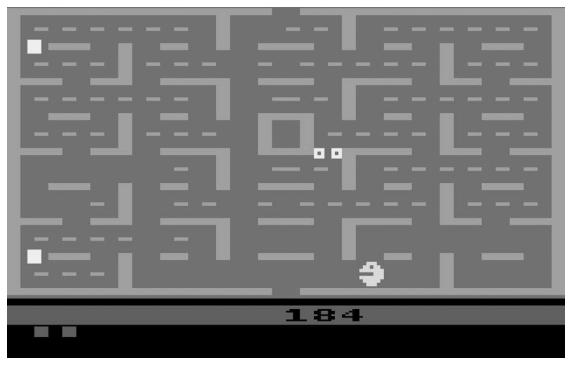

In [ ]:
x=np.sum(image,2)
x=np.float32(x)
x = 2*(x[:] - np.min(x[:])) /(np.max(x[:]) - np.min(x[:])) - 1
plot(f(x))

Classical Chua Net

In [ ]:
x0 = x
x0 = 0.*x
 
# A = np.matrix('0 0 0; 6 3 1;0 0 0')
# B = np.matrix('0 -1 0;-1 8 -1;0 -1 0')
# Z = 0.1;
 
# A = np.matrix('0 0 0; 0 1 0;0 0 0')
# B = np.matrix('0 0 0;1 1 -1;0 0 0')
# Z = -2
 
A = np.matrix('0 0 0; 0 2 0; 0 0 0')
B = np.matrix('-1 -1 -1;-1 8 -1;-1 -1 -1')
Z = -0.5
 
dt = 0.1

In [ ]:
B0=signal.convolve2d(x0, B, 'same')

for i in range(100):
    
    dx = -x + signal.convolve2d(f(x),A,'same') + B0 + Z 
    x  =  x + dx*dt

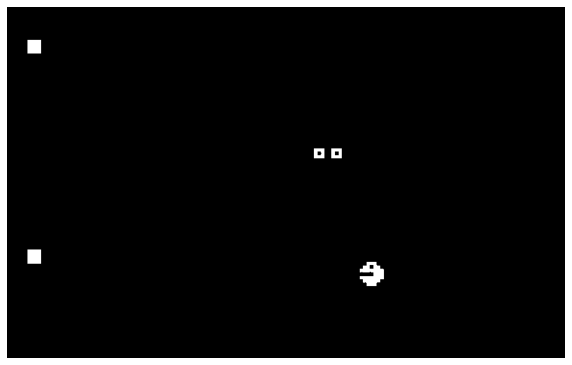

In [ ]:
plot((f(x)+1)*50)

Pytorch Version

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
x=np.sum(image,2)
x=np.float32(x)
x = 2*(x[:] - np.min(x[:])) /(np.max(x[:]) - np.min(x[:])) - 1

x = x[None,None,:,:]
x0 = 0.*x
A = np.matrix('0 0 0; 0 2 0; 0 0 0')[None,None,:,:]
B = np.matrix('-1 -1 -1;-1 8 -1;-1 -1 -1')[None,None,:,:]
Z = -0.5
dt = 0.1

In [ ]:
x = GPU(x)
x0 = GPU(x0)
A = GPU(A)
B = GPU(B)
# Z = GPU(Z)
# dt = GPU(dt)

ChuaNet

In [ ]:
B0 = conv2d(x0, B, padding=1)

for i in range(100):
    
    dx = -x + conv2d(f(x),A, padding=1) + B0 + Z
    x  = x + dx*dt

In [ ]:
xp = x[0,0,:,:]

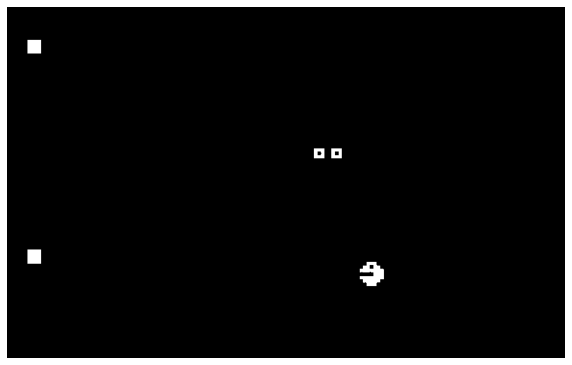

In [ ]:
plot((f(xp)+1)*50)

In [ ]:
#ChuaGAN

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
x=np.sum(image,2)
x=np.float32(x)
x = 2*(x[:] - np.min(x[:])) /(np.max(x[:]) - np.min(x[:])) - 1

x = x[None,None,:,:]
x0 = x#0.*x
A = np.matrix('0 0 0; 0 2 0; 0 0 0')[None,None,:,:]
B = np.matrix('-1 -1 -1;-1 8 -1;-1 -1 -1')[None,None,:,:]
Z = -0.5
dt = 0.1

In [ ]:
A.shape

(1, 1, 3, 3)

In [ ]:
x = GPU(x)
x0 = GPU(x0)
A = GPU(A)
B = GPU(B)
Z = GPU(Z)
dt = GPU(dt)

In [ ]:
steps = 100

A = GPU(randn_trunc((steps,1,1,3,3)))
B = GPU(randn_trunc((steps,1,1,3,3)))
Z = GPU(randn_trunc((steps,1,1,1,1)))

In [ ]:
A.shape

torch.Size([100, 1, 1, 3, 3])

In [ ]:
for i in range(steps):
    dx = -x + conv2d(f(x),A[i], padding=1) + conv2d(x0, B[i], padding=1) + Z[i]
    x  = x + dx*dt

In [ ]:
xp = x[0,0,:,:]

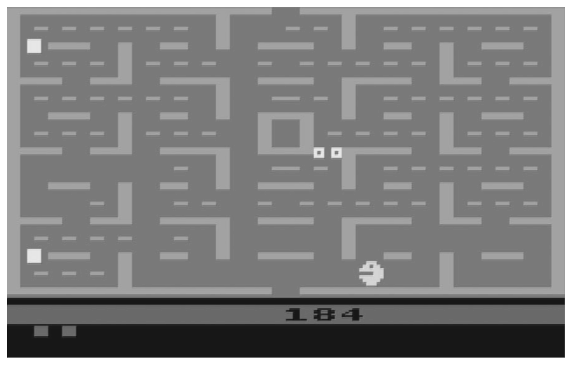

In [ ]:
plot((f(xp)+1)*50)

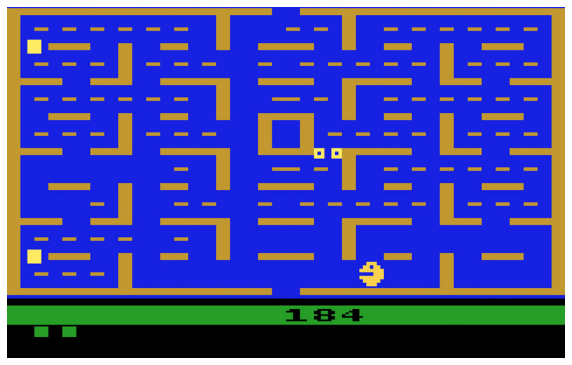

In [ ]:
image = io.imread("http://www.8-bitcentral.com/images/reviews/atari2600/pacMan2600Screen.jpg")
plot(image)

In [ ]:
def chua(image,A,B,Z):
    x = np.float32(np.sum(image,2))
    x = (2*(x[:] - np.min(x[:])) /(np.max(x[:]) - np.min(x[:])) - 1)[None,None,:,:]
    x0 = x
    x = GPU(x)
    x0 = GPU(x0)
    for i in range(A.shape[0]):
        dx = -x + conv2d(f(x),A[i], padding=1) + conv2d(x0, B[i], padding=1) + Z[i]
        x  = x + dx*dt
    return x

In [ ]:
steps = 100

A = GPU(randn_trunc((steps,1,1,3,3)))
B = GPU(randn_trunc((steps,1,1,3,3)))
Z = GPU(randn_trunc((steps,1,1,1,1)))

In [ ]:
xc = chua(image,A,B,Z)

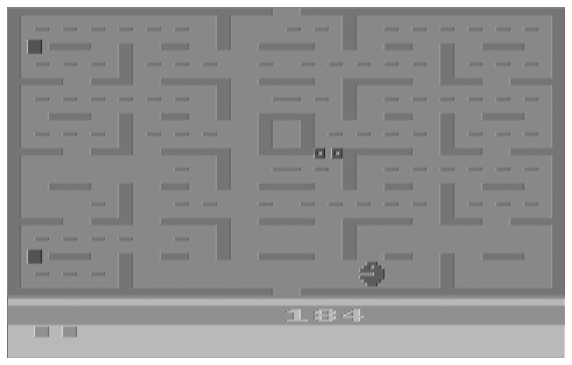

In [ ]:
plot((f(xc[0,0,:,:])+1)*50)

In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *

  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-5oidx_7h
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-5oidx_7h
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-cp36-none-any.whl size=7325 sha256=b01d20680e8920f0dc71c33fab56d7cedfecad5695a17ef16bbba46541d82ab8
  Stored in directory: /tmp/pip-ephem-wheel-cache-pe1cjjmq/wheels/89/93/47/ef43fe80a5b823a05d8dcca5ed1581f4fcdacf69b27110603f
Successfully built ImportMPCR
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import pylab
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import torchvision.utils

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
batch_size = 32

In [ ]:
#MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6265, 1, 28, 28), (60000,), (1028, 1, 28, 28), (10000,))

In [ ]:
###################################################

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:,:,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:,:,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train')

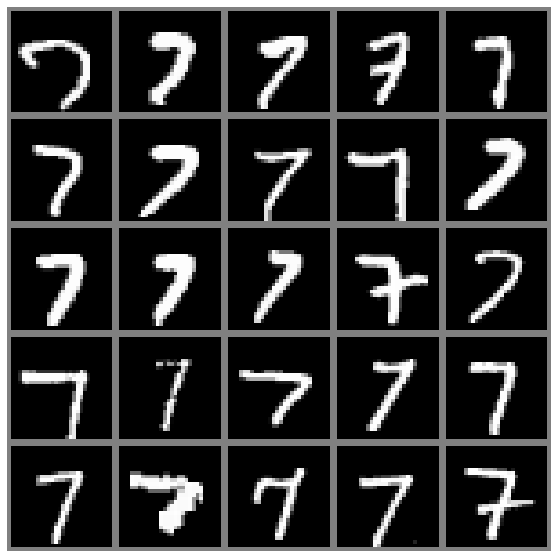

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
def backprop(model):
    if model == 'd':
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
    elif model ==  'g':
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

In [ ]:
def f(x):
    return relu(x)
    # return torch.tanh(x)#(torch.abs(x+1)/2 - torch.abs(x-1)/2);

In [ ]:
def Chua(x,A,B,Z):
    x0 = x.clone()
    for i in range(A.shape[0]):
        dx = -x + conv2d(f(x),A[i], padding=1) + conv2d(x0, B[i], padding=1) + Z[i]
        x  = x + dx*0.1 #dt
    return x

In [ ]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))

# Chua G
steps = 10
A = GPU(randn_trunc((steps,1,1,3,3)))
B = GPU(randn_trunc((steps,1,1,3,3)))
Z = GPU(randn_trunc((steps,1,1,28,28)))

w = [w0,w1,w2,A,B,Z]

In [ ]:
image = GPU(randn_trunc((1,1,28,28)))

In [ ]:
xc = Chua(image,A,B,Z)

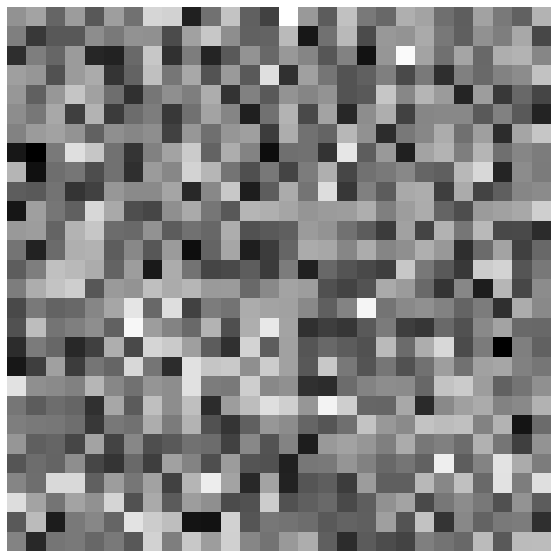

In [ ]:
plot(xc[0,0])

In [ ]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    x = torch.sigmoid(x)
    return x

In [ ]:
def G(x,w):
    return (Chua(x,w[3],w[4],w[5]))

In [ ]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.00002)
g_optimizer = torch.optim.Adam(w[3:], lr=0.00002)

real_labels = Variable(torch.ones(batch_size, 1).cuda())
fake_labels = Variable(torch.zeros(batch_size, 1).cuda())

In [ ]:
num_epochs = 500 
batches = X.shape[0]//batch_size
steps = num_epochs*batches

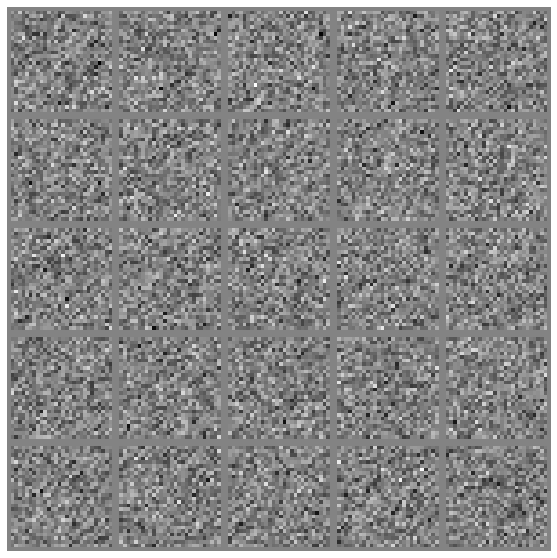

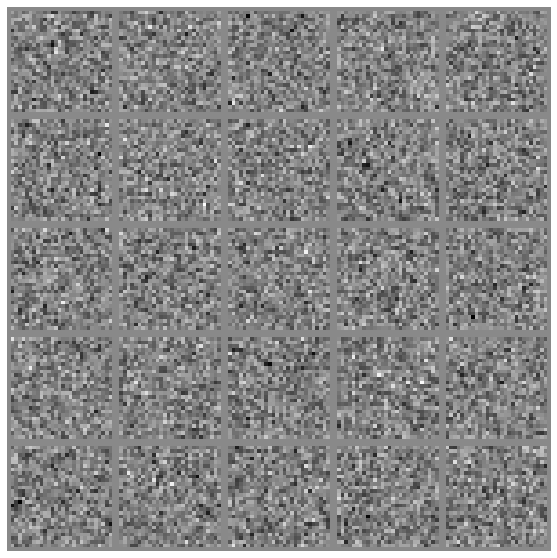

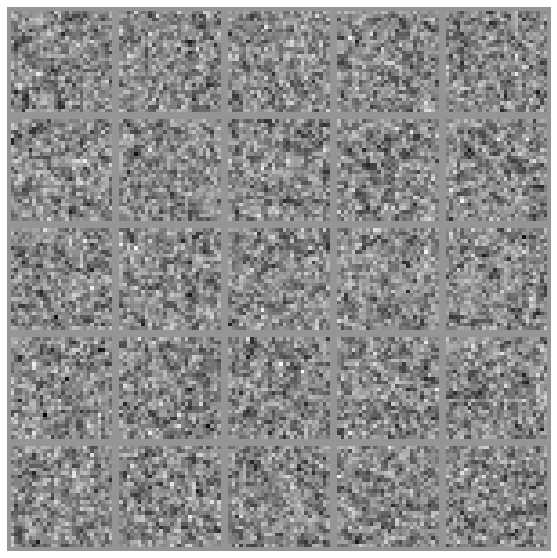

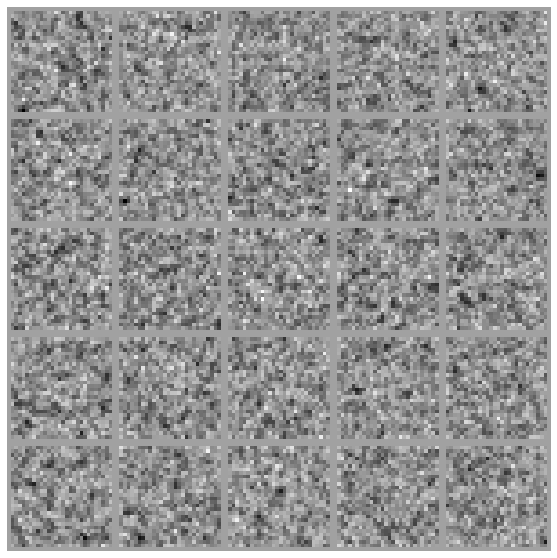

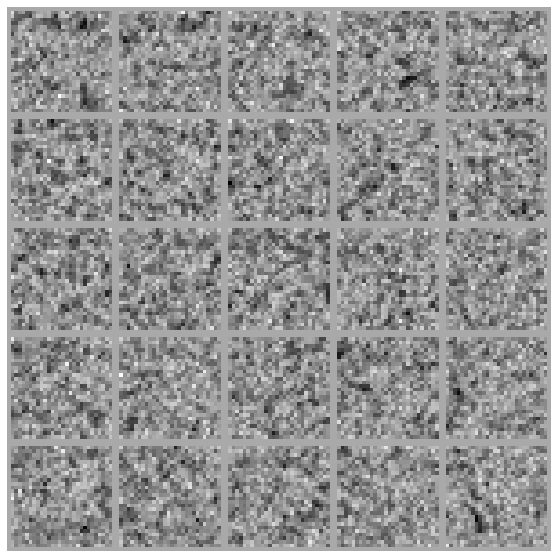

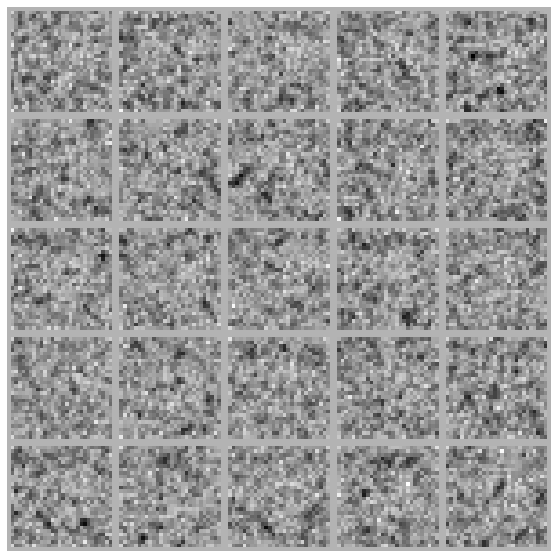

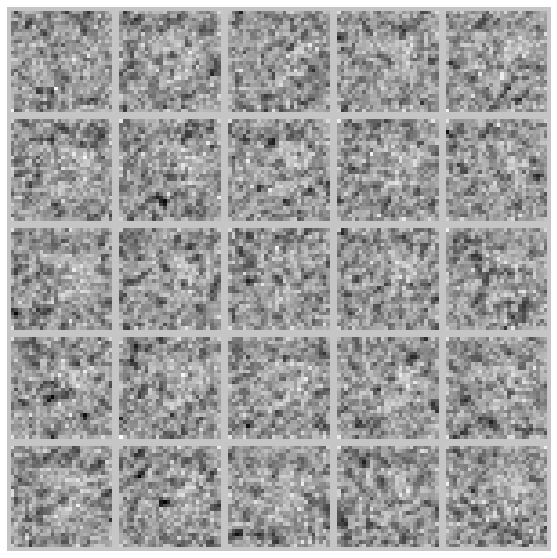

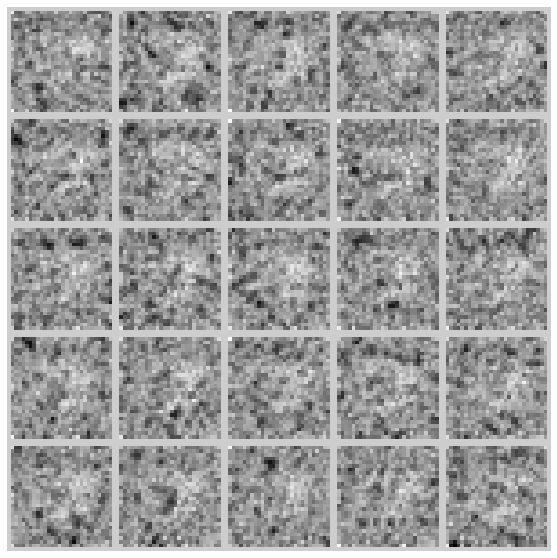

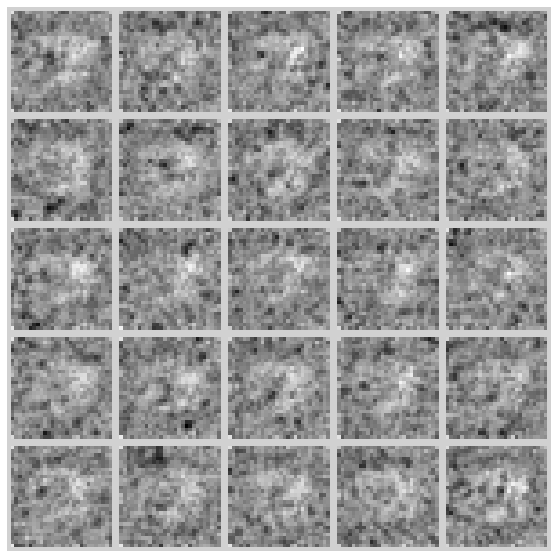

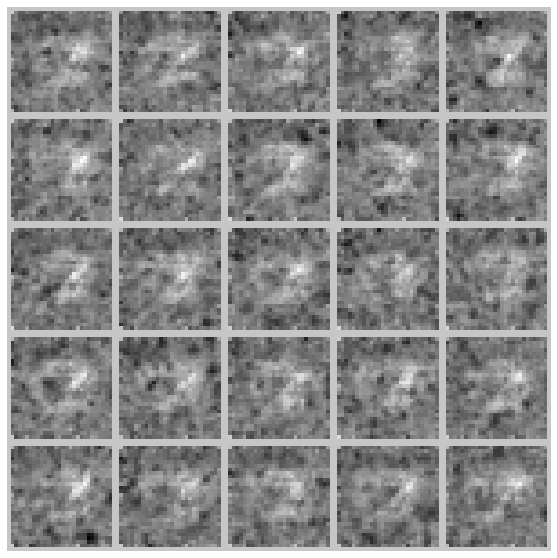

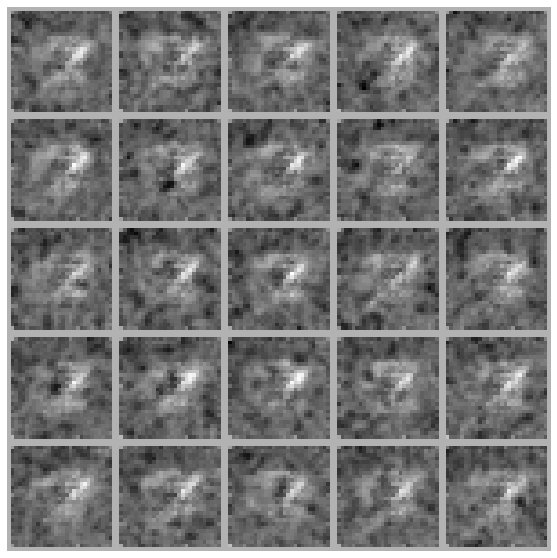

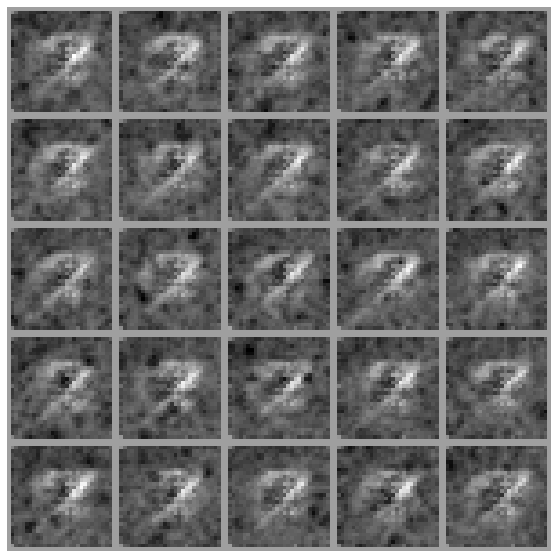

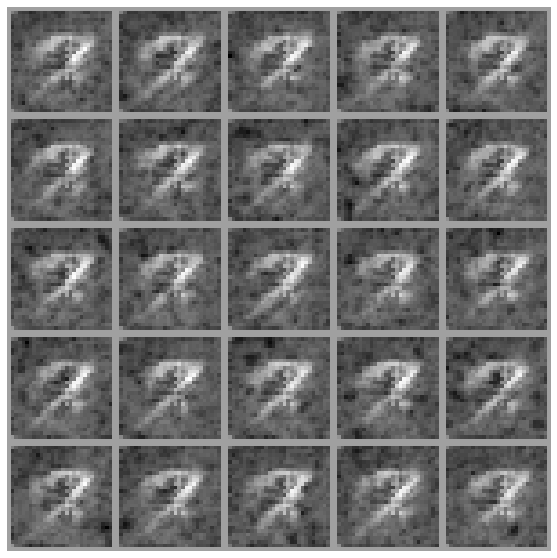

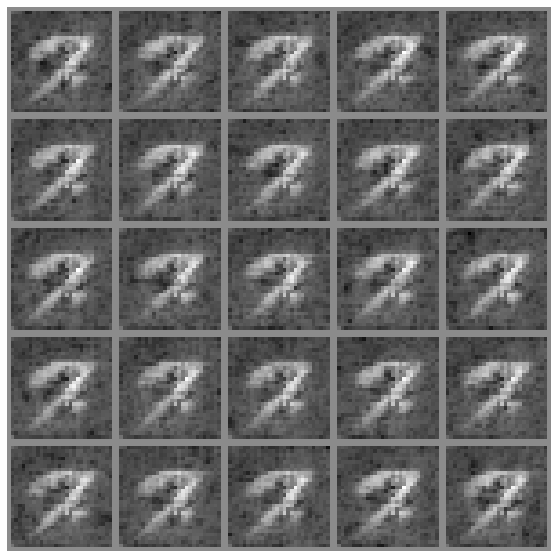

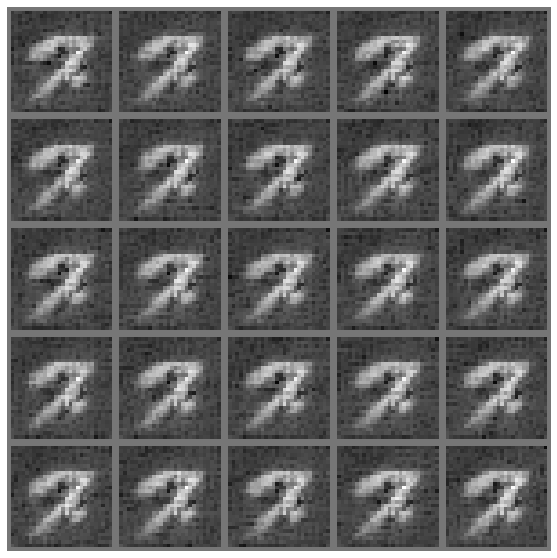

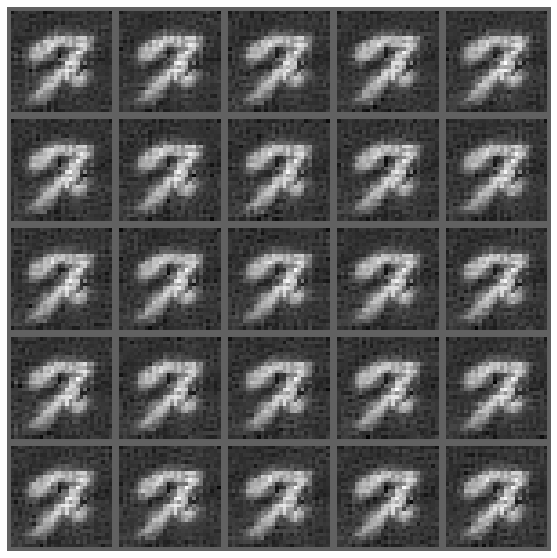

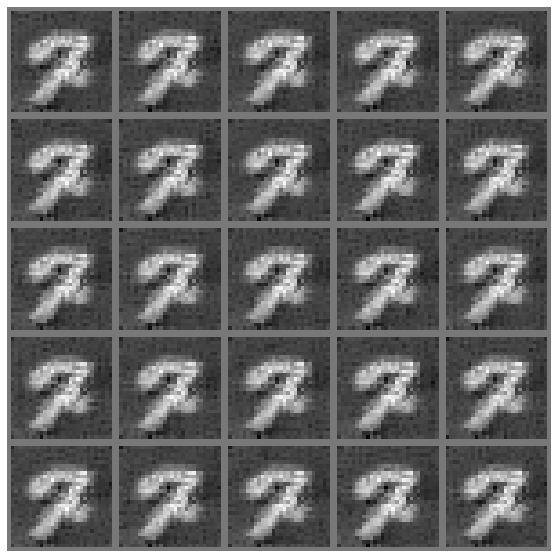

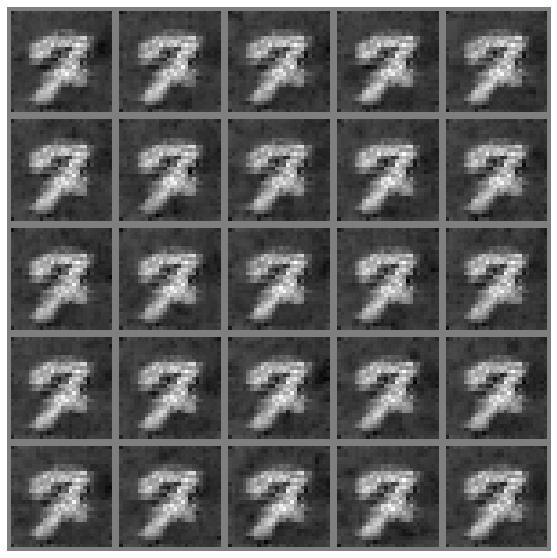

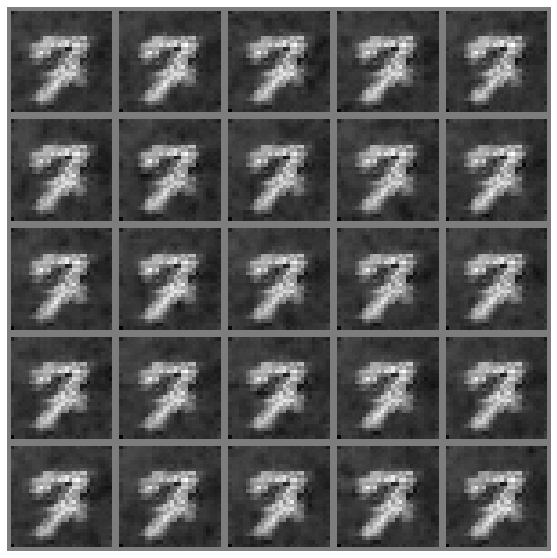

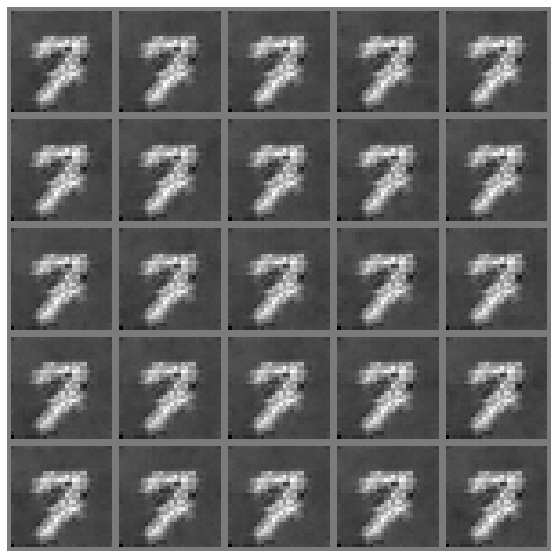

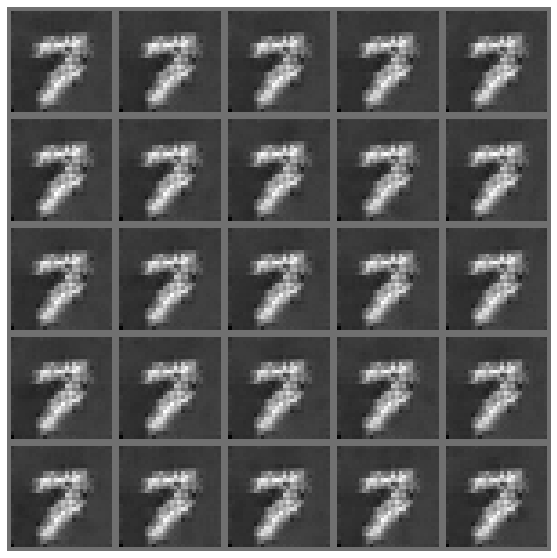

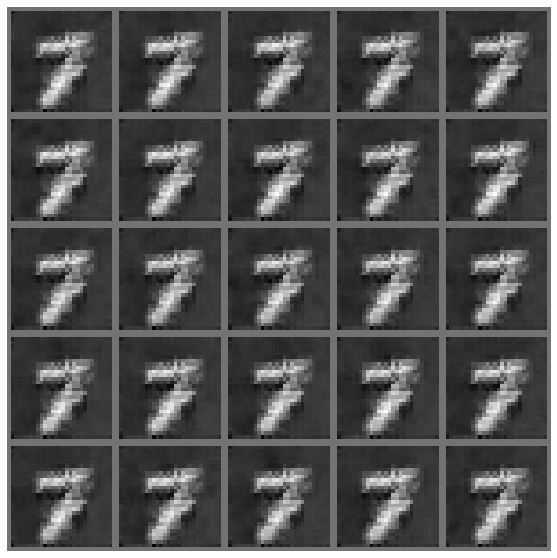

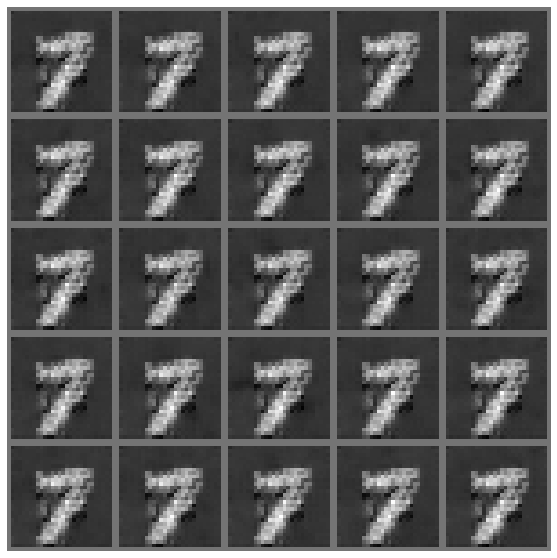

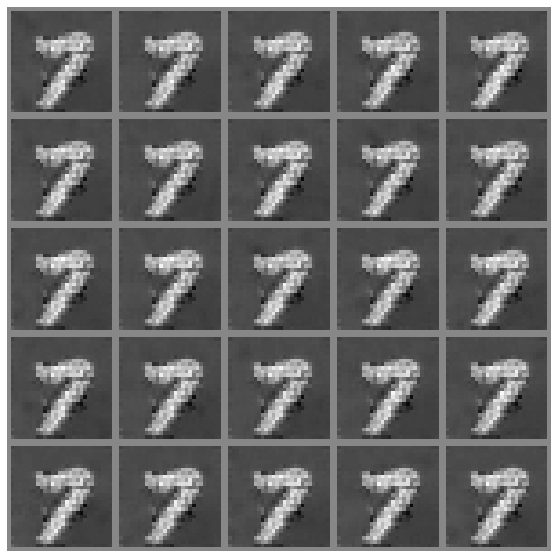

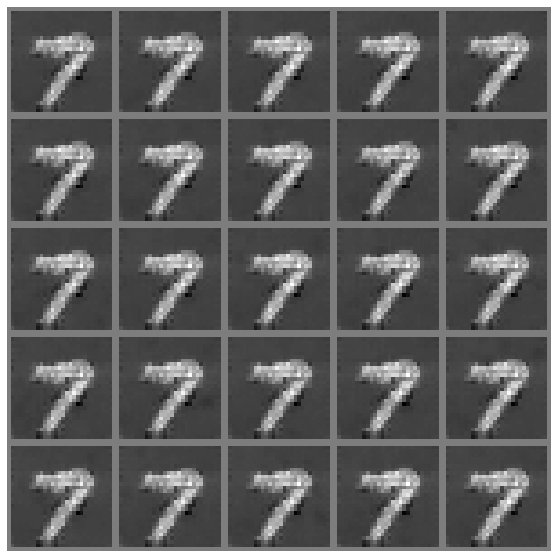

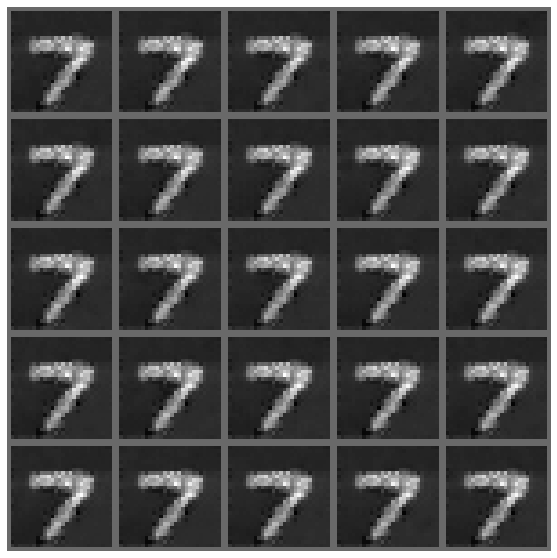

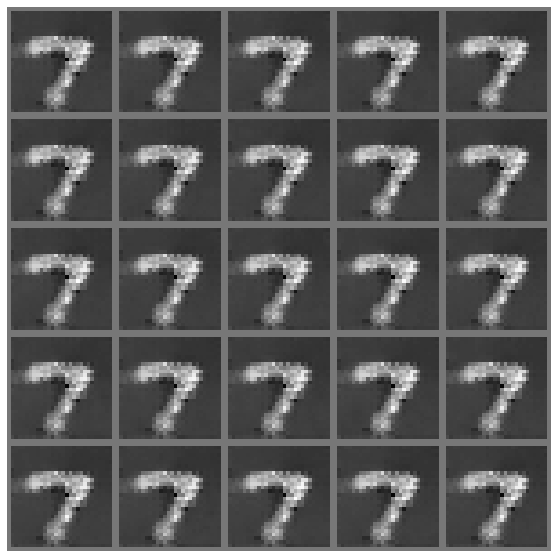

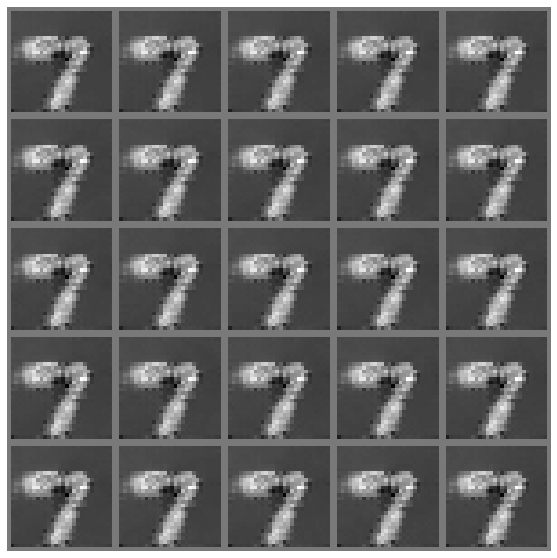

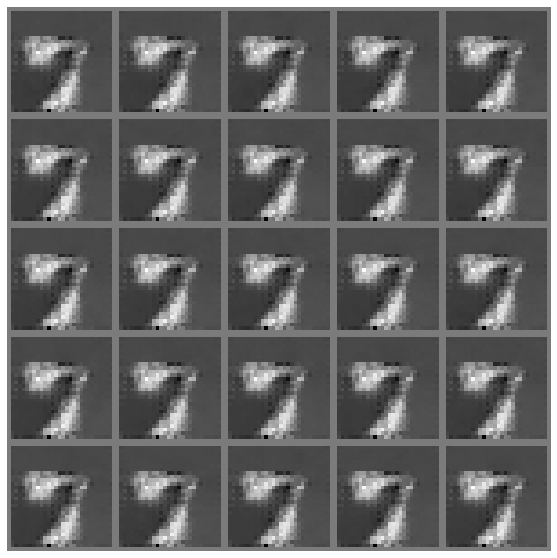

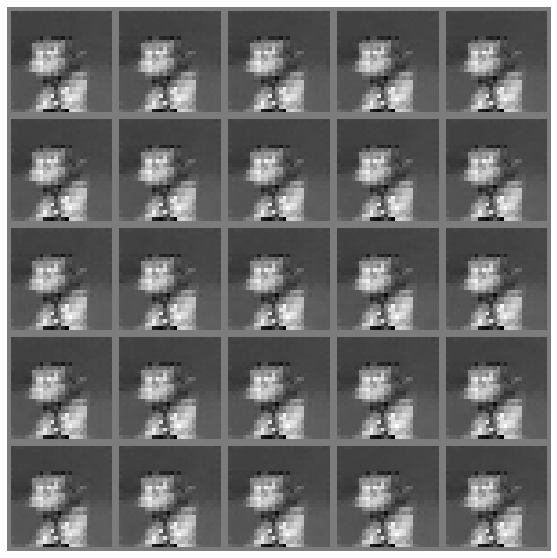

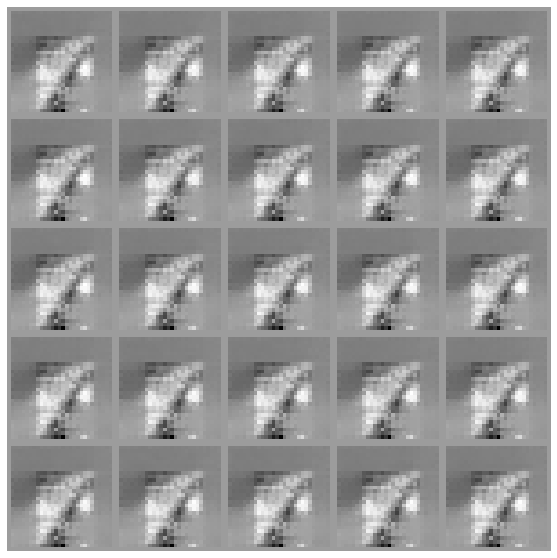

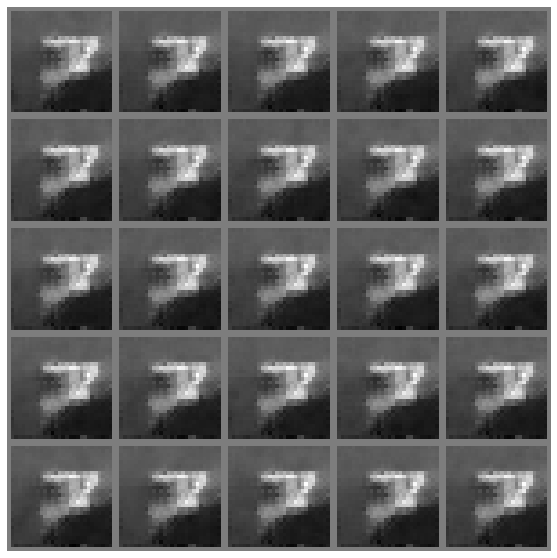

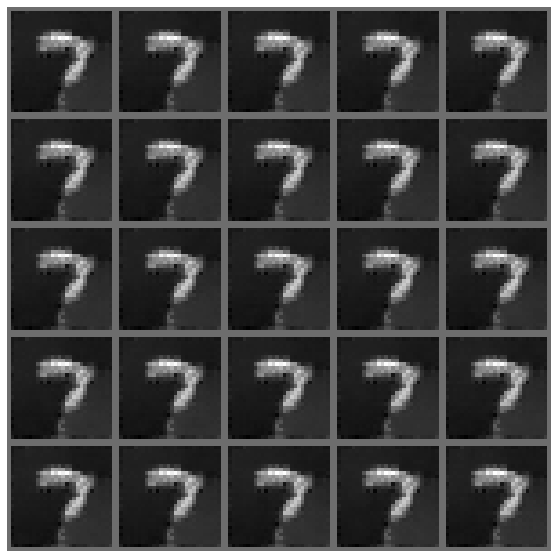

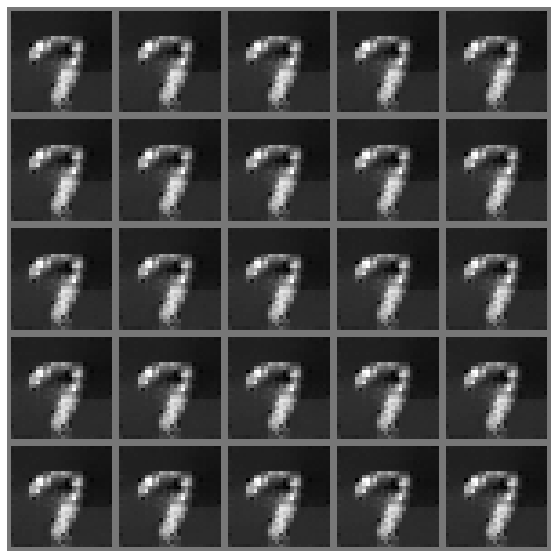

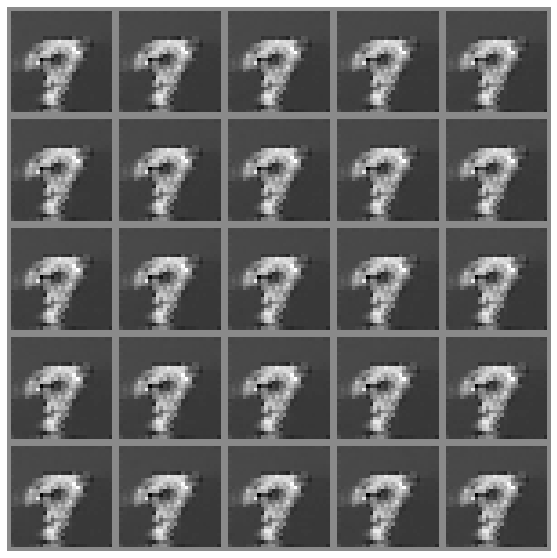

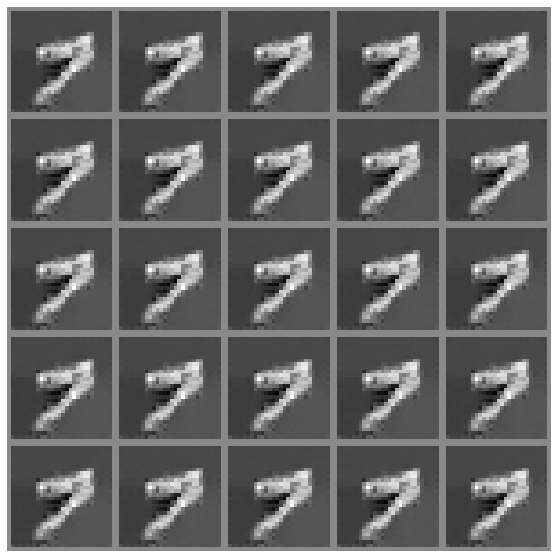

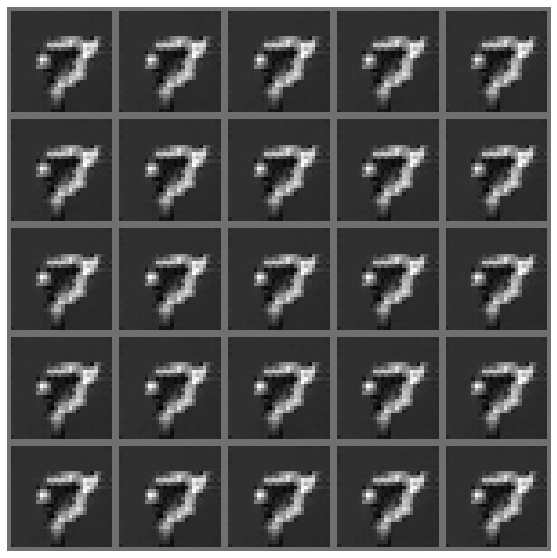

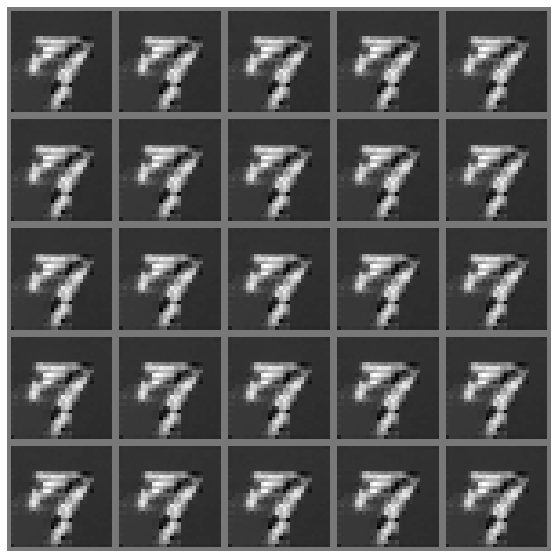

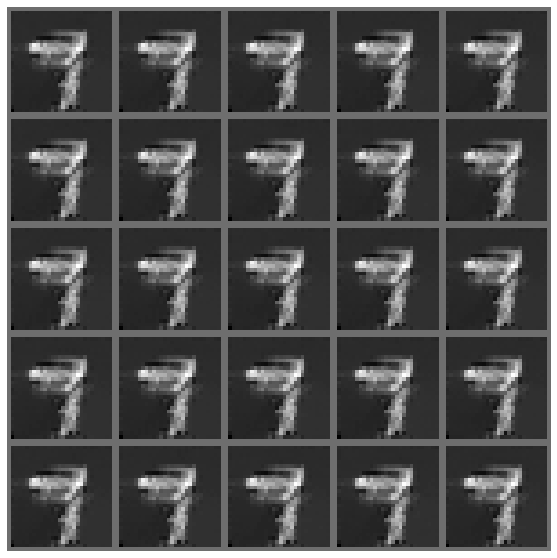

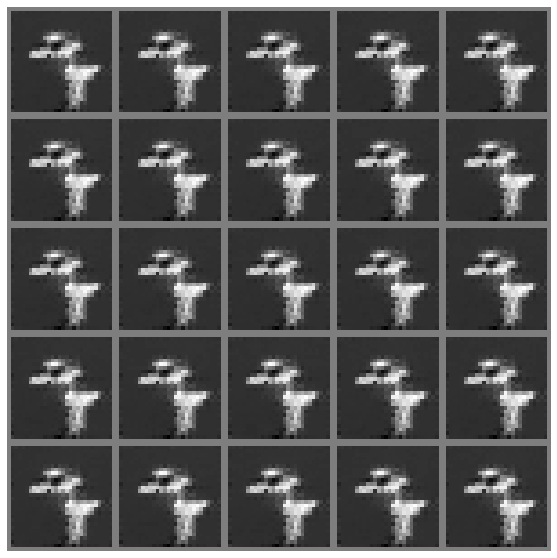

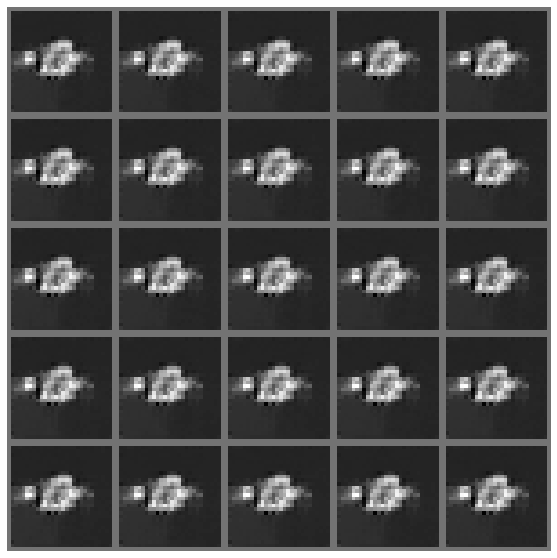

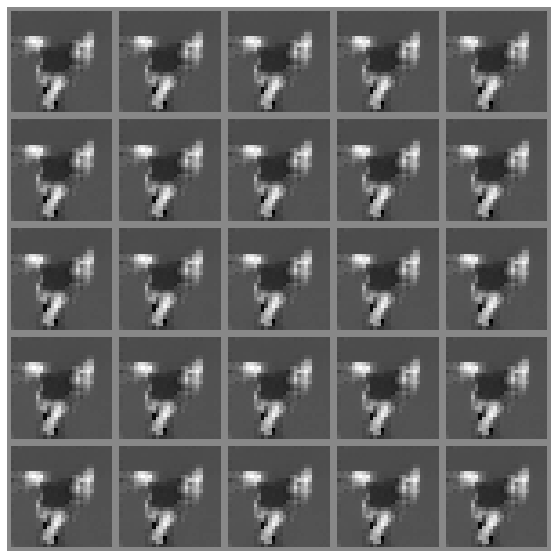

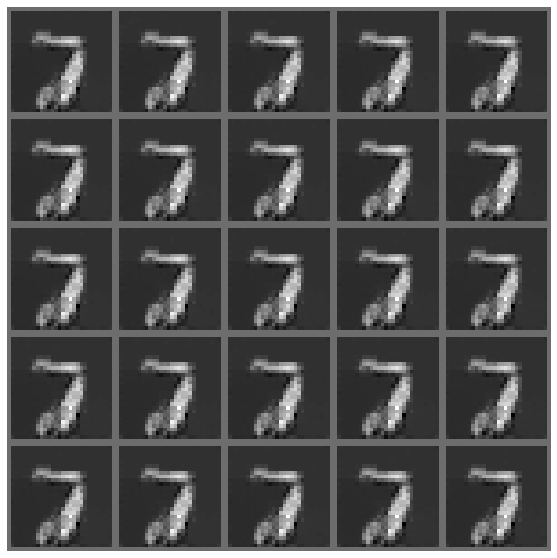

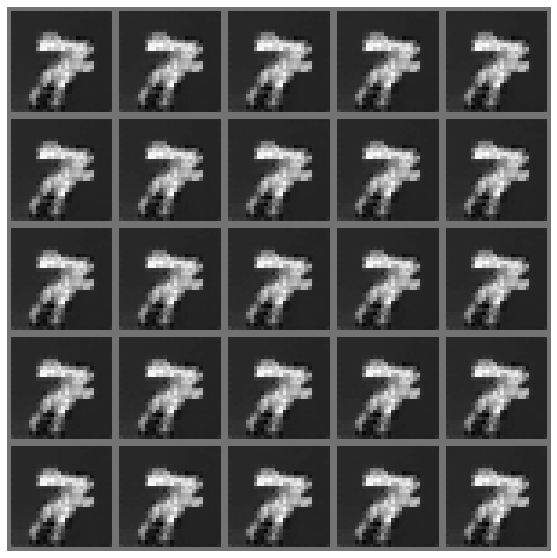

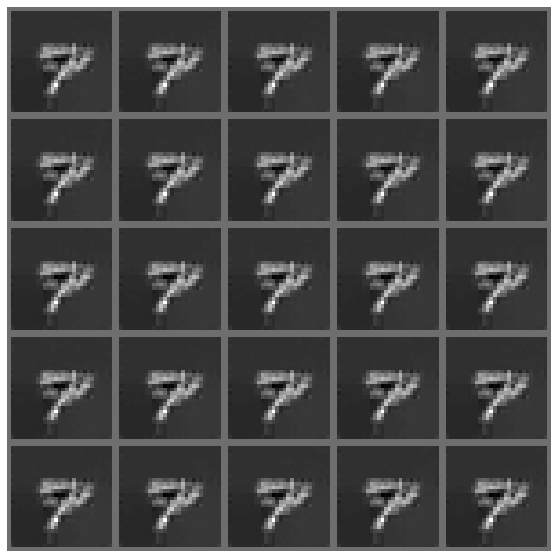

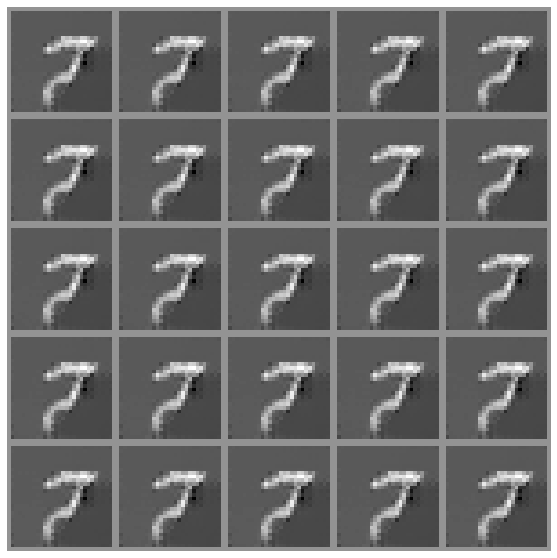

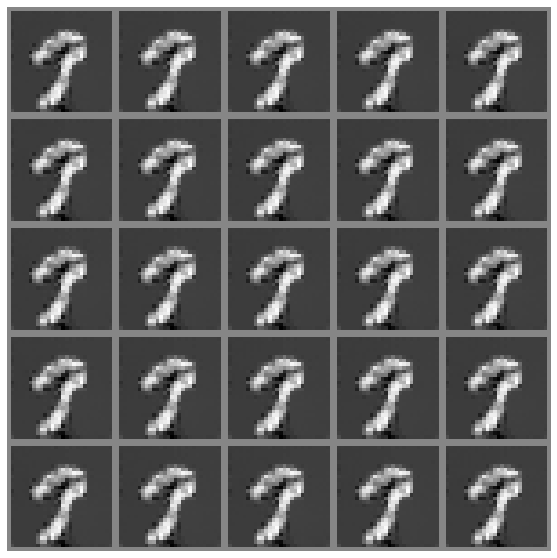

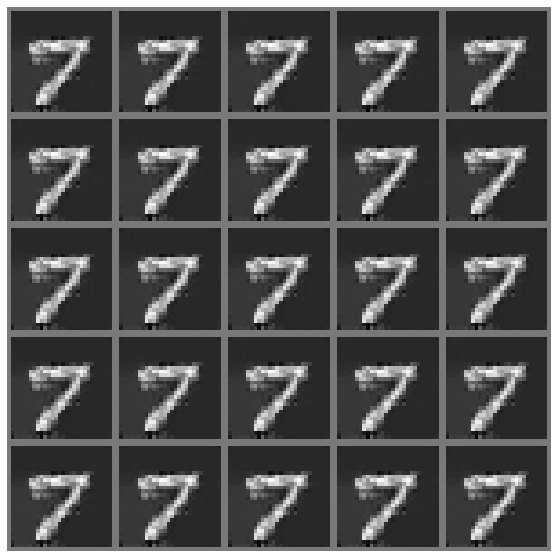

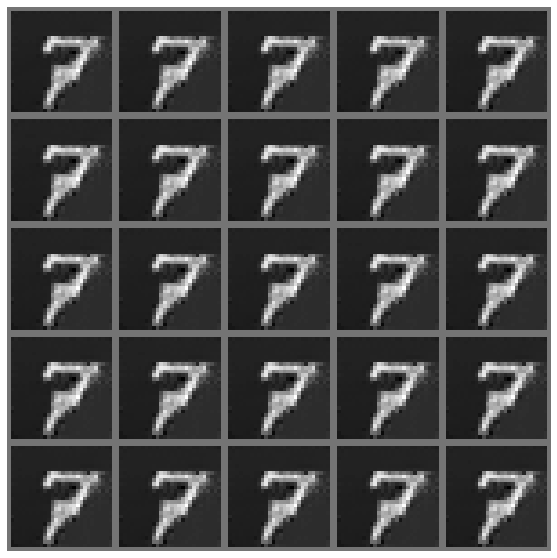

In [ ]:
for i in range(steps):
        
    images,y = get_batch('train')

    z1 = Variable(torch.randn(batch_size,1,28,28).cuda())
    z2 = Variable(torch.randn(batch_size,1,28,28).cuda())
        
    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1,w),w), fake_labels)
    backprop('d')
    
    g_loss = binary_cross_entropy(D(G(z2,w),w), real_labels)
    backprop('g')



    
    if i % 2000 == 0:
        out = G(z1,w)
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])